In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from gensim.models import KeyedVectors
import random

In [2]:
# 1. LOAD YOUR EMBEDDINGS

# GloVe-like embedding (already in word2vec format)
glove_path = "/kaggle/input/wikiarticles/wiki_giga_2024_50_MFT20_vectors_word2vec.txt"

glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
print("Loaded custom GloVe 50d from wiki_giga_2024")

# Word2Vec (GoogleNews 300d)
w2v_path = "//kaggle/input/wikiarticles/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin"

w2v_model = KeyedVectors.load_word2vec_format(w2v_path, binary=True)
print("Loaded GoogleNews Word2Vec 300d")

Loaded custom GloVe 50d from wiki_giga_2024
Loaded GoogleNews Word2Vec 300d


In [3]:
# 2. VISUALIZATION FUNCTIONS

words_20 = [
    "king", "queen", "man", "woman", "child",
    "cat", "dog", "lion", "tiger", "horse",
    "car", "bus", "train", "plane", "ship",
    "apple", "banana", "orange", "grape", "melon"
]

cluster_words_25 = [
    "king", "queen", "prince", "princess", "man",
    "woman", "boy", "girl", "cat", "dog",
    "lion", "tiger", "car", "bus", "train",
    "plane", "ship", "table", "chair", "sofa",
    "apple", "banana", "orange", "grape", "lemon"
]

def plot_3d(model, words, method="random", title_prefix=""):
    X = np.array([model[w] for w in words])

    if method == "random":
        dims = random.sample(range(X.shape[1]), 3)
        X_plot = X[:, dims]
        title = "Random 3D"
    elif method == "pca":
        X_plot = PCA(n_components=3).fit_transform(X)
        title = "PCA 3D"
    elif method == "tsne":
        X_plot = TSNE(n_components=3, perplexity=10, random_state=42).fit_transform(X)
        title = "t-SNE 3D"
    else:
        raise ValueError("Unknown method")

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X_plot[:,0], X_plot[:,1], X_plot[:,2], s=40)

    for i, word in enumerate(words):
        ax.text(X_plot[i,0], X_plot[i,1], X_plot[i,2], word)

    ax.set_title(f"{title_prefix} — {title}")
    plt.show()

In [7]:
# 3. COSINE SIMILARITY

def print_cosines(model, related, unrelated, name):
    print(f"\n {name}: COSINE SIMILARITY")

    print("\nRelated pairs:")
    for w1, w2 in related:
        print(f"{w1} - {w2}: {model.similarity(w1, w2):.4f}")

    print("\nUnrelated pairs:")
    for w1, w2 in unrelated:
        print(f"{w1} - {w2}: {model.similarity(w1, w2):.4f}")

In [5]:
# 4. HIERARCHICAL CLUSTERING

def plot_clustering(model, words, title):
    X = np.array([model[w] for w in words])
    Z = linkage(X, method='ward')

    plt.figure(figsize=(10,6))
    dendrogram(Z, labels=words, leaf_rotation=90)
    plt.title(title)
    plt.show()

MODEL: Custom GloVe 50d (wiki_giga_2024)


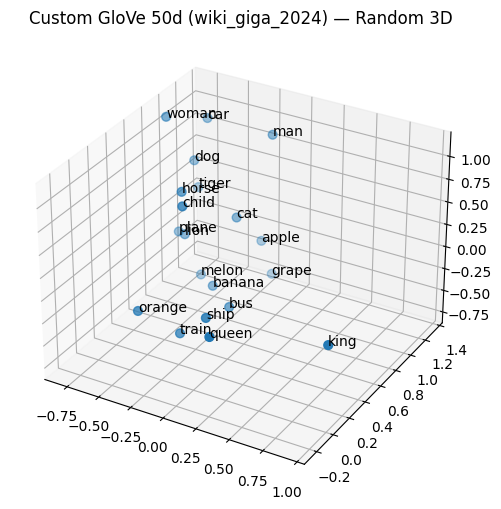

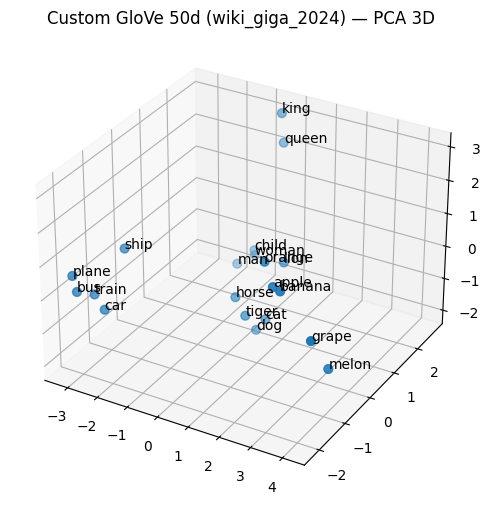

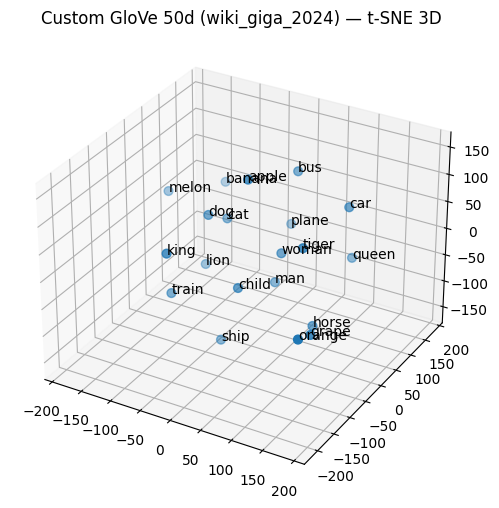


 Custom GloVe 50d (wiki_giga_2024): COSINE SIMILARITY

Related pairs:
king - queen: 0.8096
man - woman: 0.8748
cat - dog: 0.9410

Unrelated pairs:
king - banana: 0.3098
table - sky: 0.5050


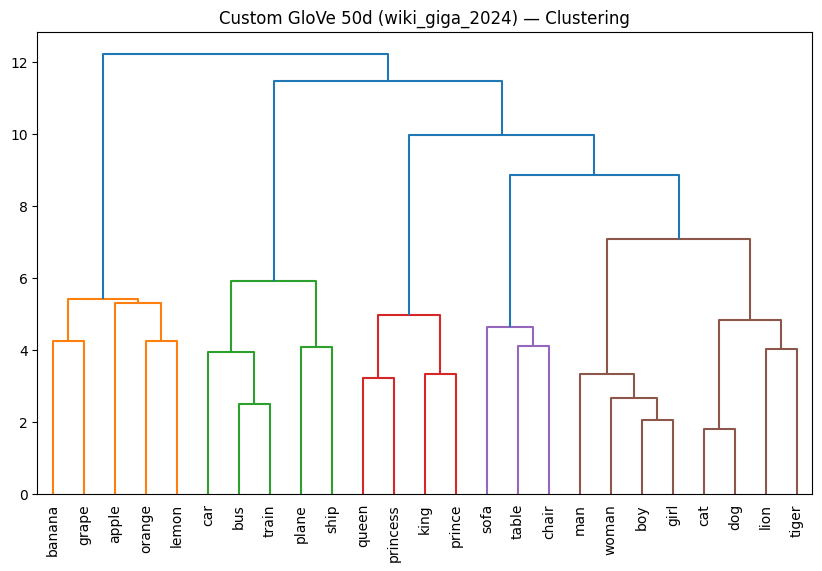

MODEL: Word2Vec 300d (GoogleNews)


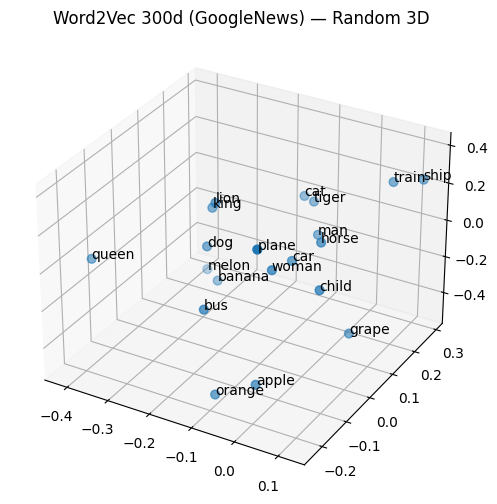

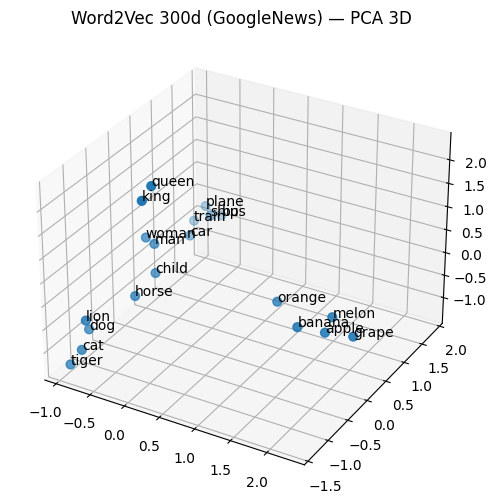

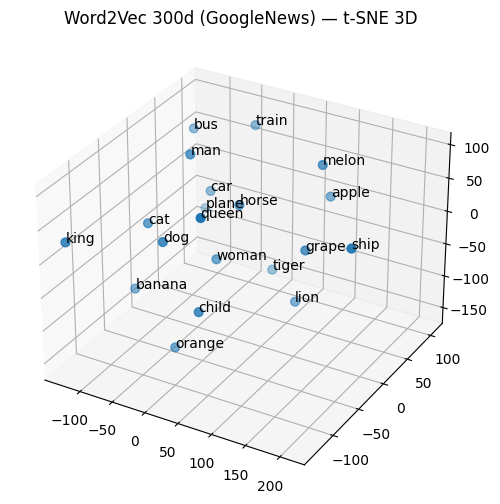


 Word2Vec 300d (GoogleNews): COSINE SIMILARITY

Related pairs:
king - queen: 0.6511
man - woman: 0.7664
cat - dog: 0.7609

Unrelated pairs:
king - banana: 0.1365
table - sky: 0.0687


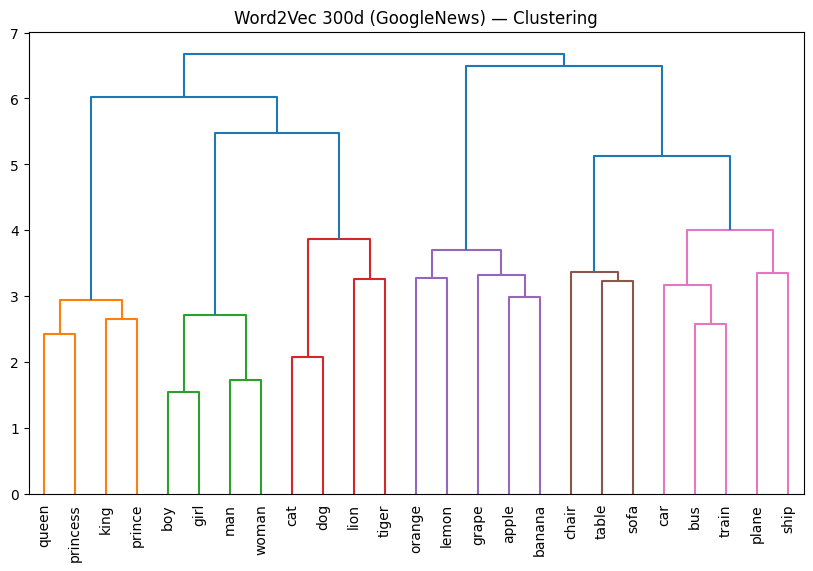

In [8]:
# 5. MAIN LOOP FOR BOTH MODELS

models = {
    "Custom GloVe 50d (wiki_giga_2024)": glove_model,
    "Word2Vec 300d (GoogleNews)": w2v_model
}

related_pairs = [
    ("king", "queen"),
    ("man", "woman"),
    ("cat", "dog")
]

unrelated_pairs = [
    ("king", "banana"),
    ("table", "sky")
]

for name, model in models.items():

    print(f"MODEL: {name}")

    plot_3d(model, words_20, "random", name)
    plot_3d(model, words_20, "pca", name)
    plot_3d(model, words_20, "tsne", name)

    # Similarity
    print_cosines(model, related_pairs, unrelated_pairs, name)

    # Clustering
    plot_clustering(model, cluster_words_25, f"{name} — Clustering")

# CONCLUSION
